# Data Science Project - Stock Portfolio Performance

Importing Modules

In [3]:
!pip install matplotlib

In [6]:
# Python Version

!python --version

#load Module

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)

Python 3.11.5
numpy version: 1.24.3
pandas version:  2.0.3


Loading Data 

The Dataset of performances of weighted scoring stock portfolios are obtained with mixture design from the US stock market historical database.

Dataset source (UCI Machine Learning Repository): https://archive.ics.uci.edu/ml/datasets/Stock+portfolio+performance

Dataset download link: stock portfolio performance data set.xlsx

In [7]:
# Read all sheets 
total_sheets=6

#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00390/stock%20portfolio%20performance%20data%20set.xlsx
data_file_link_xlsx='https://archive.ics.uci.edu/ml/machine-learning-databases/00390/stock%20portfolio%20performance%20data%20set.xlsx'

# sheet list
sheet_list=list()

for sheet in range(total_sheets-1):
  # Read dataset 
  sheet_list.append(pd.read_excel(data_file_link_xlsx,sheet_name=sheet,header=1))

In [8]:
# column dict 
column_dict={'ID':'id',
             ' Large B/P ':'bp_large',
             ' Large ROE ':'roe_large',
             ' Large S/P ':'sp_large',
             ' Large Return Rate in the last quarter ':'ror_large_last_quarter',
             ' Large Market Value ':'mv_large',
             ' Small systematic Risk':'systematic_risk_small',
             'Annual Return':'annual_return',
             'Excess Return':'excess_return',
             'Systematic Risk':'systemtic_risk_actual',
             'Total Risk':'total_risk',
             'Abs. Win Rate':'abs_win_rate',
             'Rel. Win Rate':'relative_win_rate',
             'Annual Return.1':'annual_return_norm',
             'Excess Return.1':'excess_return_norm',
             'Systematic Risk.1':'systemtic_risk_actual_norm',
             'Total Risk.1':'total_risk_norm',
             'Abs. Win Rate.1':'abs_win_rate_norm',
             'Rel. Win Rate.1':'relative_win_rate_norm'}
# sort by key dict
#sorted(column_dict.items(), key=lambda kv: column_dict[kv[0]])
# key by value - example 'bp_large'
#[k for k,v in column_dict.items() if v == 'bp_large']

# MultiIndex
mId=pd.IndexSlice

In [9]:
# 3d dataframe 
data3d=pd.concat(sheet_list,axis=0,keys=['sheet_'+str(sheet) for sheet in range(total_sheets)])
# rename columns 
data3d.rename(index=None,columns=column_dict,axis=None,copy=True,inplace=True)
# see
data3d#[data3d['annual_return'] == 0.531874802303275]

id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_0 0    1     1.000      0.000     0.000                   0.000   
        1    2     0.000      1.000     0.000                   0.000   
        2    3     0.000      0.000     1.000                   0.000   
        3    4     0.000      0.000     0.000                   1.000   
        4    5     0.000      0.000     0.000                   0.000   
...         ..       ...        ...       ...                     ...   
sheet_4 58  59     0.200      0.200     0.200                   0.000   
        59  60     0.200      0.200     0.000                   0.200   
        60  61     0.200      0.000     0.200                   0.200   
        61  62     0.000      0.200     0.200                   0.200   
        62  63     0.167      0.167     0.167                   0.167   

            mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_0 0      0.000                  0.000       0.019516       0.013399   
        1      0.000                  0.000       0.023829       0.006410   
        2      0.000                  0.000       0.080282       0.026548   
        3      0.000                  0.000      -0.006683       0.000728   
        4      1.000                  0.000       0.021999       0.004407   
...              ...                    ...            ...            ...   
sheet_4 58     0.200                  0.200       0.171000       0.022000   
        59     0.200                  0.200       0.153000       0.018000   
        60     0.200                  0.200       0.156000       0.018000   
        61     0.200                  0.200       0.161000       0.018000   
        62     0.167                  0.167       0.173000       0.022000   

            systemtic_risk_actual  total_risk  abs_win_rate  \
sheet_0 0                1.902608    0.218617         0.600   
        1                1.263287    0.128740         0.550   
        2                1.894339    0.208272         0.550   
        3                1.425454    0.155526         0.550   
        4                1.094579    0.106729         0.650   
...                           ...         ...           ...   
sheet_4 58               0.940000    0.100000         0.700   
        59               0.880000    0.087000         0.725   
        60               0.970000    0.104000         0.663   
        61               0.980000    0.094000         0.688   
        62               0.910000    0.095000         0.713   

            relative_win_rate  annual_return_norm  excess_return_norm  \
sheet_0 0               0.400            0.488229            0.609445   
        1               0.650            0.505279            0.508169   
        2               0.500            0.728484            0.800000   
        3               0.350            0.384640            0.425836   
        4               0.700            0.498046            0.479146   
...                       ...                 ...                 ...   
sheet_4 58              0.638            0.685397            0.706792   
        59              0.638            0.595786            0.631599   
        60              0.525            0.612546            0.631119   
        61              0.663            0.635785            0.634402   
        62              0.663            0.692692            0.716476   

            systemtic_risk_actual_norm  total_risk_norm  abs_win_rate_norm  \
sheet_0 0                     0.780756         0.800000               0.68   
        1                     0.443776         0.414220               0.56   
        2                     0.776397         0.755594               0.56   
        3                     0.529253         0.529196               0.56   
        4                     0.354852         0.319743               0.80   
...                                ...              ...                ...   
sheet_4 58                    

Long Term 

In [10]:
# See down trends - top three from bottom 
ltm_worse_three_idx=data3d.loc['sheet_4'].sort_values('annual_return',ascending=True).index[:3]
ltm_worse_three=data3d.loc['sheet_4'].sort_values('annual_return',ascending=True).id.values[:3]
print('worse_three',ltm_worse_three)

# See down trends - top three from top 
ltm_best_three_idx=data3d.loc['sheet_4'].sort_values('annual_return',ascending=False).index[:3]
ltm_best_three=data3d.loc['sheet_4'].sort_values('annual_return',ascending=False).id.values[:3]
print('best_three',ltm_best_three)

data3d.loc[mId['sheet_4',ltm_worse_three_idx],data3d.columns[:10]]

worse_three [ 6 41 16]
best_three [ 7 22 42]


id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_4 5    6       0.0        0.0       0.0                   0.000   
        40  41       0.0        0.0       0.0                   0.333   
        15  16       0.0        0.0       0.0                   0.500   

            mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_4 5      0.000                  1.000           0.07         -0.005   
        40     0.333                  0.333           0.09          0.000   
        15     0.500                  0.000           0.09         -0.001   

            systemtic_risk_actual  
sheet_4 5                    1.10  
        40                   1.13  
        15                   1.15

In [11]:
data3d.loc[mId['sheet_4',ltm_best_three_idx],data3d.columns[:10]]

id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_4 6    7     0.500      0.500     0.000                    0.00   
        21  22     0.333      0.333     0.333                    0.00   
        41  42     0.250      0.250     0.250                    0.25   

            mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_4 6        0.0                    0.0          0.195          0.026   
        21       0.0                    0.0          0.192          0.024   
        41       0.0                    0.0          0.191          0.024   

            systemtic_risk_actual  
sheet_4 6                    0.97  
        21                   1.08  
        41                   1.06

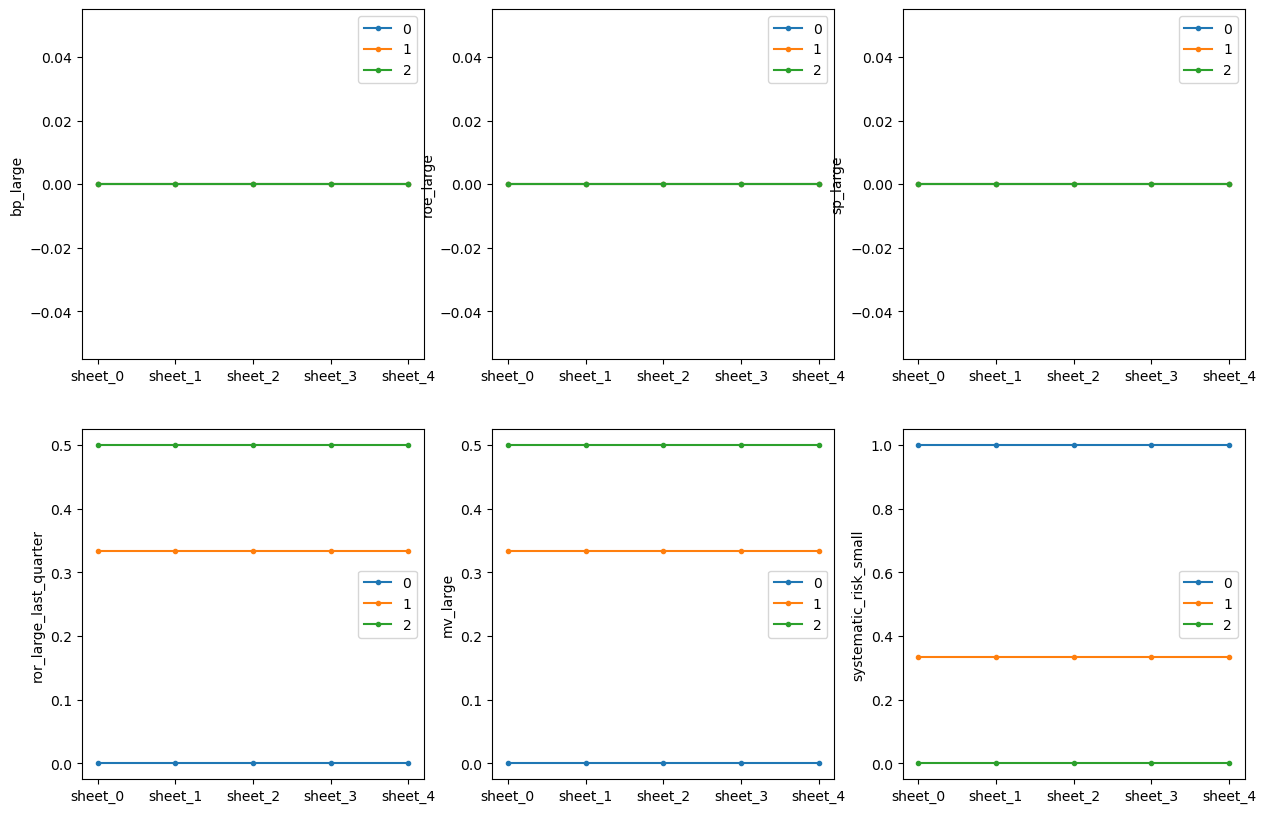

In [12]:
# plot 20 years data for worse three
plt.figure(figsize=(15,10))

# plot trends 
# x - axis
x_axis=['sheet_'+str(x) for x in range(total_sheets-1)]

for n_plot,column in enumerate(data3d.columns[1:7],1):
  plt.subplot(2,3,n_plot)
  # y - axis
  y_axis_all=[data3d.loc[pd.IndexSlice[:,ltm_worse_three_idx[y]],column].values for y in range(3)]
  # plot
  for n,y_axis in enumerate(y_axis_all,0):
    plt.plot(x_axis,y_axis,label=str(n),marker='.')
  plt.legend(),plt.ylabel(column)

plt.show()

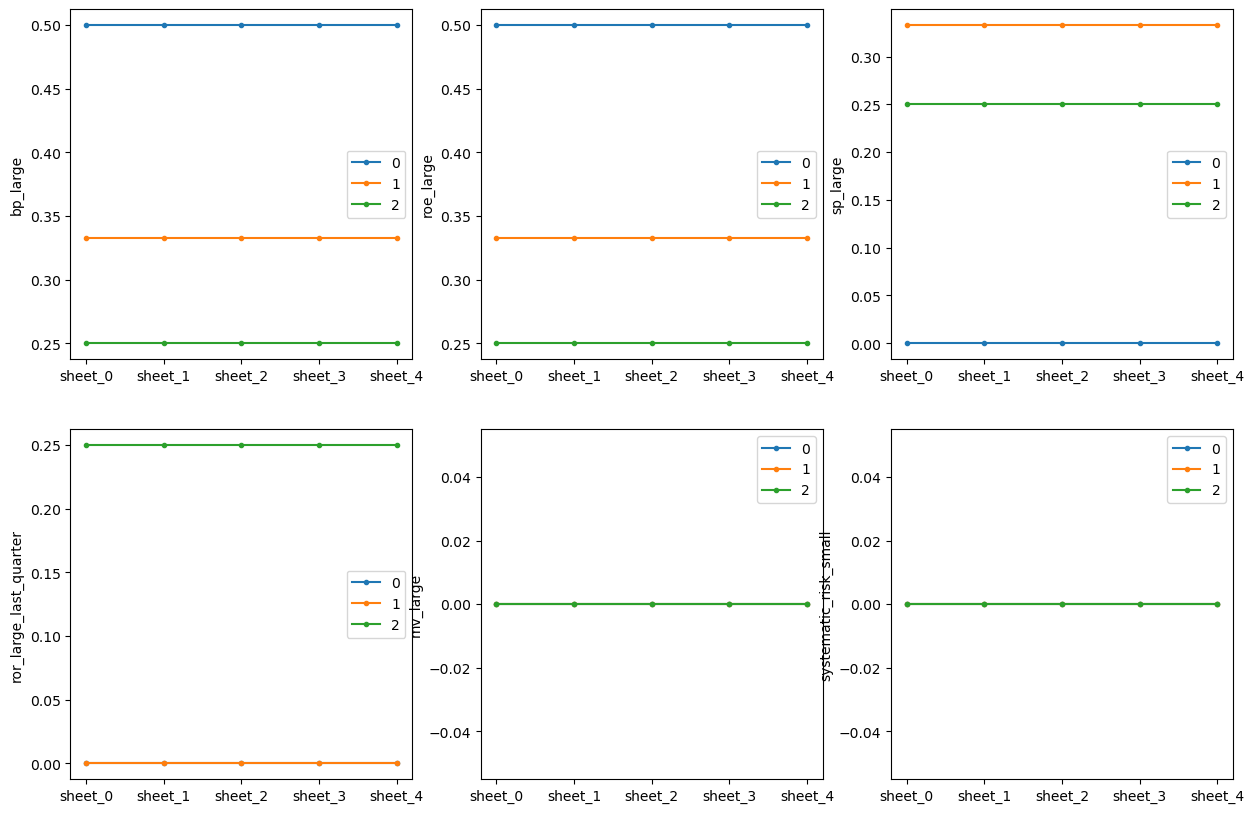

In [13]:
# plot 20 years data for best three
plt.figure(figsize=(15,10))

# plot trends 
# x - axis
x_axis=['sheet_'+str(x) for x in range(total_sheets-1)]
# 
for n_plot,column in enumerate(data3d.columns[1:7],1):
  plt.subplot(2,3,n_plot)
  # y - axis
  y_axis_all=[data3d.loc[pd.IndexSlice[:,ltm_best_three_idx[y]],column].values for y in range(3)]
  # plot
  for n,y_axis in enumerate(y_axis_all,0):
    plt.plot(x_axis,y_axis,label=str(n),marker='.')
  plt.legend(),plt.ylabel(column)

plt.show()

Short Term

In [14]:
# See down trends - top three from bottom 
stm_worse_three_idx=data3d.sort_values('annual_return',ascending=True).index[:3]
stm_worse_three=data3d.sort_values('annual_return',ascending=True).id.values[:3]
print('worse_three',stm_worse_three)

# See down trends - top three from top 
stm_best_three_idx=data3d.sort_values('annual_return',ascending=False).index[:3]
stm_best_three=data3d.sort_values('annual_return',ascending=False).id.values[:3]
print('best_three',stm_best_three)

data3d.loc[mId[stm_worse_three_idx],data3d.columns[:10]]

worse_three [ 6 17 16]
best_three [22  7  3]


id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_0 5    6       0.0        0.0       0.0                     0.0   
        16  17       0.5        0.0       0.0                     0.0   
sheet_1 15  16       0.0        0.0       0.0                     0.5   

            mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_0 5        0.0                    1.0      -0.053382      -0.014856   
        16       0.0                    0.5      -0.023439      -0.006177   
sheet_1 15       0.5                    0.0      -0.007220       0.004897   

            systemtic_risk_actual  
sheet_0 5                0.859995  
        16               0.977325  
sheet_1 15               1.141957

In [15]:
data3d.loc[mId[stm_best_three_idx],data3d.columns[:10]]

id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_1 21  22     0.333      0.333     0.333                     0.0   
        6    7     0.500      0.500     0.000                     0.0   
        2    3     0.000      0.000     1.000                     0.0   

            mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_1 21       0.0                    0.0       0.300086       0.073955   
        6        0.0                    0.0       0.297516       0.071642   
        2        0.0                    0.0       0.295726       0.076156   

            systemtic_risk_actual  
sheet_1 21               1.067218  
        6                0.902055  
        2                1.316862

Short Term Minimum Risk 

In [16]:
data3d.sort_values(['annual_return','systemtic_risk_actual'],ascending=False).head()

id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_1 21  22     0.333      0.333     0.333                     0.0   
        6    7     0.500      0.500     0.000                     0.0   
        2    3     0.000      0.000     1.000                     0.0   
sheet_3 6    7     0.500      0.500     0.000                     0.0   
        21  22     0.333      0.333     0.333                     0.0   

            mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_1 21       0.0                    0.0       0.300086       0.073955   
        6        0.0                    0.0       0.297516       0.071642   
        2        0.0                    0.0       0.295726       0.076156   
sheet_3 6        0.0                    0.0       0.294884       0.024584   
        21       0.0                    0.0       0.290061       0.022651   

            systemtic_risk_actual  total_risk  abs_win_rate  \
sheet_1 21               1.067218    0.120580          0.85   
        6                0.902055    0.102550          0.80   
        2                1.316862    0.147754          0.65   
sheet_3 6                1.060690    0.064909          0.90   
        21               1.091540    0.071344          0.80   

            relative_win_rate  annual_return_norm  excess_return_norm  \
sheet_1 21               0.85            0.800000            0.781465   
        6                0.85            0.794983            0.761993   
        2                0.85            0.791489            0.800000   
sheet_3 6                0.70            0.800000            0.777744   
        21               0.75            0.778624            0.745203   

            systemtic_risk_actual_norm  total_risk_norm  abs_win_rate_norm  \
sheet_1 21                    0.371233         0.458673           0.800000   
        6                     0.233249         0.318102           0.714286   
        2                     0.579796         0.670530           0.457143   
sheet_3 6                     0.462267         0.460149           0.800000   
        21                    0.491525         0.549004           0.560000   

            relative_win_rate_norm  
sheet_1 21                   0.725  
        6                    0.725  
        2                    0.725  
sheet_3 6                    0.650  
        21                   0.725

Prediction - Long Term 

In [17]:
data3d.columns

Index(['id', 'bp_large', 'roe_large', 'sp_large', 'ror_large_last_quarter',
       'mv_large', 'systematic_risk_small', 'annual_return', 'excess_return',
       'systemtic_risk_actual', 'total_risk', 'abs_win_rate',
       'relative_win_rate', 'annual_return_norm', 'excess_return_norm',
       'systemtic_risk_actual_norm', 'total_risk_norm', 'abs_win_rate_norm',
       'relative_win_rate_norm'],
      dtype='object')

In [18]:
# data (input) ['bp_large','roe_large','sp_large','ror_large_last_quarter','mv_large','systematic_risk_small']
in_names=['bp_large','roe_large','sp_large','ror_large_last_quarter','mv_large','systematic_risk_small']
X=data3d.loc[mId['sheet_4',:],data3d.columns[1:7]].values  # sort term - X=data3d.loc[mId['sheet_0':'sheet_3',:],data3d.columns[1:7]].values

# labels (to predict) ['annual_return','excess_return','total_risk']
outs_name=['annual_return','excess_return','total_risk']
y=data3d.loc[mId['sheet_4',:],['annual_return','excess_return','total_risk']].values # sort term - y=data3d.loc[mId['sheet_0':'sheet_3',:],['annual_return','excess_return','total_risk']].values

X.shape,y.shape

((63, 6), (63, 3))

In [19]:
# import function 
from sklearn.preprocessing import normalize
# doc -> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer

X_norm,norms_of_x=normalize(X,norm='l1',axis=0,copy=True,return_norm=True)
y_norm,norms_of_y=normalize(y,norm='l1',axis=0,copy=True,return_norm=True)

# split
from sklearn.model_selection import train_test_split
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
nX_train,nX_test,ny_train,ny_test=train_test_split(X_norm,y_norm,test_size=0.10,random_state=7)
# _________________________________________________________________
# split - un-norm data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=7)

# shape
nX_train.shape,nX_test.shape,ny_train.shape,ny_test.shape

((56, 6), (7, 6), (56, 3), (7, 3))

In [20]:
# linear model for multiple outputs - norm data
from sklearn.linear_model import LinearRegression
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# make model for multiple outputs 
nliner_multi=LinearRegression()
# to know more - https://github.com/scikit-learn/scikit-learn/blob/15a949460/sklearn/linear_model/_base.py#L391
# train model 
nliner_multi.fit(nX_train,ny_train)
# print coef_
print('coef_ of shape:',nliner_multi.coef_.shape,': value -\n',nliner_multi.coef_)
# print intercept_
print('intercept_ of shape:',nliner_multi.intercept_.shape,': value -\n',nliner_multi.intercept_)

coef_ of shape: (3, 6) : value -
 [[ 2.202696    2.23229594  2.24975041  2.15741387  2.13026079  2.12529582]
 [ 5.91621291  5.97400974  6.010513    5.78611649  5.73625632  5.75602156]
 [-0.31908885 -0.37532361 -0.3165433  -0.32982325 -0.39759677 -0.36089127]]
intercept_ of shape: (3,) : value -
 [-0.19191142 -0.54251533  0.04914567]


Linear Regression Model

In [21]:
# make model for single outputs - norm data
nliner_single=LinearRegression()
# to know more - https://github.com/scikit-learn/scikit-learn/blob/15a949460/sklearn/linear_model/_base.py#L391

# train model 
nliner_single.fit(nX_train,ny_train[:,0])
# print coef_
print('coef_ of shape:',nliner_single.coef_.shape,': value -\n',nliner_single.coef_)
# print intercept_
print('intercept_ of shape:',nliner_single.intercept_.shape,': value -\n',nliner_single.intercept_)


# make model for single outputs - un-norm data
liner_single=LinearRegression()
# train model 
liner_single.fit(X_train,y_train[:,0])

coef_ of shape: (6,) : value -
 [2.202696   2.23229594 2.24975041 2.15741387 2.13026079 2.12529582]
intercept_ of shape: () : value -
 -0.19191141657380026


LinearRegression()

In [22]:
# error 
from sklearn.metrics import mean_absolute_error
# source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

print('error multi-outputs norm:',mean_absolute_error(ny_test,nliner_multi.predict(nX_test),multioutput='raw_values')*norms_of_y) # avg
print('error single-outputs norm:',mean_absolute_error(ny_test[:,0],nliner_single.predict(nX_test))*norms_of_y[0]) # avg
print('error single-outputs un-norm:',mean_absolute_error(y_test[:,0],liner_single.predict(X_test)))
print('absolute difference:',(ny_test[:,0]-nliner_single.predict(nX_test))*norms_of_y[0])

error multi-outputs norm: [0.01927095 0.005284   0.00775093]
error single-outputs norm: 0.019270951142947832
error single-outputs un-norm: 0.01927095114294758
absolute difference: [-0.02585069 -0.03771539  0.01296044 -0.02185498  0.01766048  0.00254028
 -0.01631441]


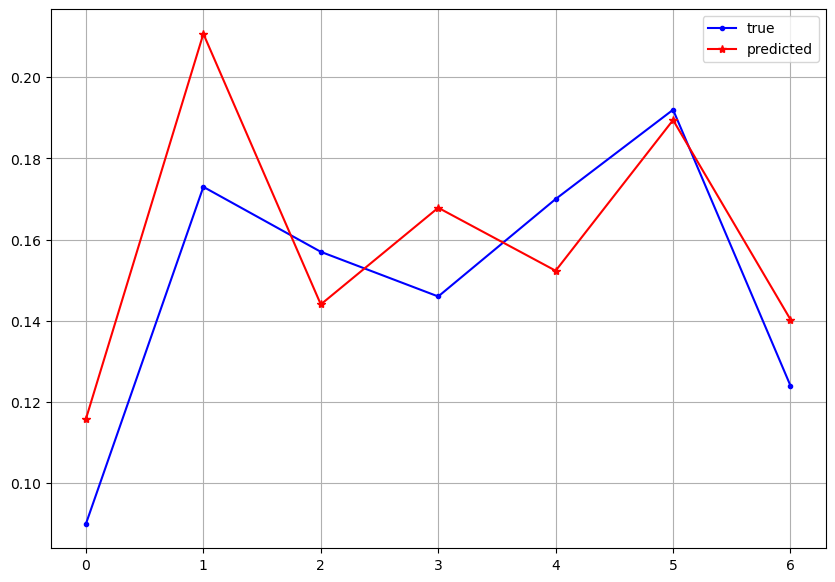

In [23]:
# plot 
plt.figure(figsize=(10,7))
plt.plot(range(y_test.shape[0]),y_test[:,0],c='b',marker='.',label='true')
plt.plot(range(y_test.shape[0]),liner_single.predict(X_test),c='r',marker='*',label='predicted')
plt.grid(),plt.legend()
plt.show()

Decision Tree

In [24]:
# make model for single output 
from sklearn.tree import DecisionTreeRegressor
# source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

# calculations
# MSE = (sum_square_of_left / w_l) + (sum_square_of_right / w_r)
# FriedmanMSE = (w_r * total_left_sum - w_l * total_rigth_sum)**2 / (w_r * w_l)

# make model - un-norm
tree_single=DecisionTreeRegressor(criterion='friedman_mse',random_state=7)
# train model 
tree_single.fit(X_train,y_train[:,0])
print('error single-outputs un-norm:',mean_absolute_error(y_test[:,0],tree_single.predict(X_test)))

# make model - norm
ntree_single=DecisionTreeRegressor(criterion='friedman_mse',random_state=7)
# train model 
ntree_single.fit(nX_train,ny_train[:,0])
print('error single-outputs norm',mean_absolute_error(ny_test[:,0],ntree_single.predict(nX_test))*norms_of_y[0])

error single-outputs un-norm: 0.008714285714285706
error single-outputs norm 0.009142857142857128


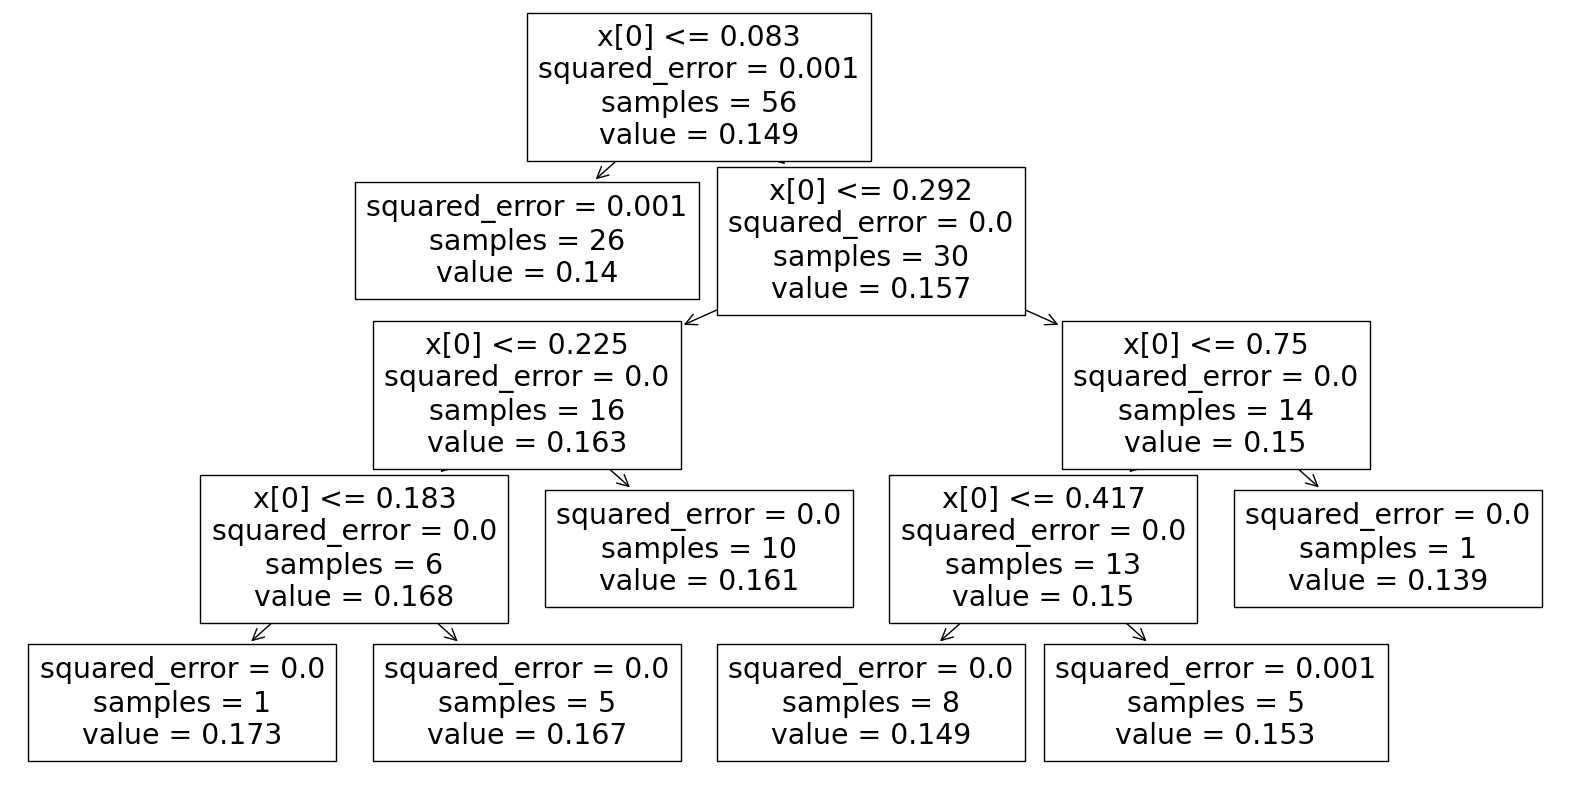

In [25]:
# make model for single output 
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
sample_tree_single=DecisionTreeRegressor(max_depth=7).fit(X_train[:,0].reshape(-1,1),y_train[:,0])
plot_tree(sample_tree_single)
plt.show()

Decision Tree Vs. Linear Regression Model

In [26]:
print('error linear single-outputs un-norm:',mean_absolute_error(y_test[:,0],liner_single.predict(X_test)))
print('error tree single-outputs un-norm:',mean_absolute_error(y_test[:,0],tree_single.predict(X_test)))
print('absolute difference linear:',y_test[:,0]-liner_single.predict(X_test))
print('absolute difference tree:',y_test[:,0]-tree_single.predict(X_test))
print('absolute difference linear-tree:',liner_single.predict(X_test)-tree_single.predict(X_test))

error linear single-outputs un-norm: 0.01927095114294758
error tree single-outputs un-norm: 0.008714285714285706
absolute difference linear: [-0.02585069 -0.03771539  0.01296044 -0.02185498  0.01766048  0.00254028
 -0.01631441]
absolute difference tree: [-0.003  0.003  0.019  0.008 -0.013  0.001 -0.014]
absolute difference linear-tree: [ 0.02285069  0.04071539  0.00603956  0.02985498 -0.03066048 -0.00154028
  0.00231441]


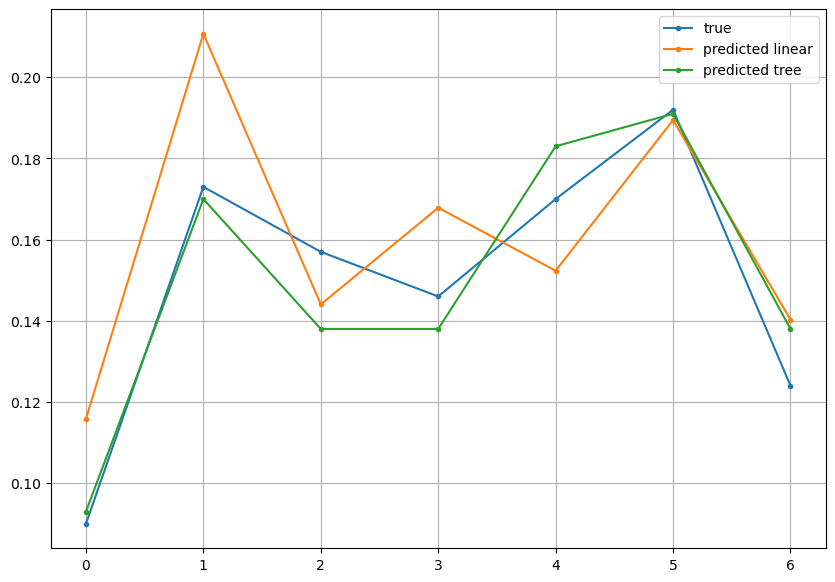

In [27]:
# plot 
plt.figure(figsize=(10,7))
plt.plot(range(y_test.shape[0]),y_test[:,0],marker='.',label='true')
plt.plot(range(y_test.shape[0]),liner_single.predict(X_test),marker='.',label='predicted linear')
plt.plot(range(y_test.shape[0]),tree_single.predict(X_test),marker='.',label='predicted tree')
plt.grid(),plt.legend()
plt.show()

Improving Tree

In [28]:
# make model for single output - Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

# make model - un-norm
gboost_tree_single=GradientBoostingRegressor(learning_rate=0.1,criterion='friedman_mse')
# train model 
gboost_tree_single.fit(X_train,y_train[:,0])
print('error Gradient Boosting Regressor-outputs un-norm:',mean_absolute_error(y_test[:,0],gboost_tree_single.predict(X_test)))

# make model for single output - 
from sklearn.ensemble import RandomForestRegressor
# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# make model - un-norm
forest_single=RandomForestRegressor(criterion='friedman_mse')
# train model 
forest_single.fit(X_train,y_train[:,0])
print('error Forest Regressor-outputs un-norm:',mean_absolute_error(y_test[:,0],forest_single.predict(X_test)))

error Gradient Boosting Regressor-outputs un-norm: 0.007529135019854578
error Forest Regressor-outputs un-norm: 0.012502857142857145


In [29]:
print('error Gradient Boosting Regressor-outputs un-norm:',mean_absolute_error(y_test[:,0],gboost_tree_single.predict(X_test)))
print('error tree single-outputs un-norm:',mean_absolute_error(y_test[:,0],tree_single.predict(X_test)))
print('error linear single-outputs un-norm:',mean_absolute_error(y_test[:,0],liner_single.predict(X_test)))
print('Gradient Boosting Regressor score:',gboost_tree_single.score(X_test,y_test[:,0]))
print('tree score:',tree_single.score(X_test,y_test[:,0]))
print('linear score:',liner_single.score(X_test,y_test[:,0]))

error Gradient Boosting Regressor-outputs un-norm: 0.007529135019854578
error tree single-outputs un-norm: 0.008714285714285706
error linear single-outputs un-norm: 0.01927095114294758
Gradient Boosting Regressor score: 0.9057719335358216
tree score: 0.8849778608278833
linear score: 0.5278509157028584


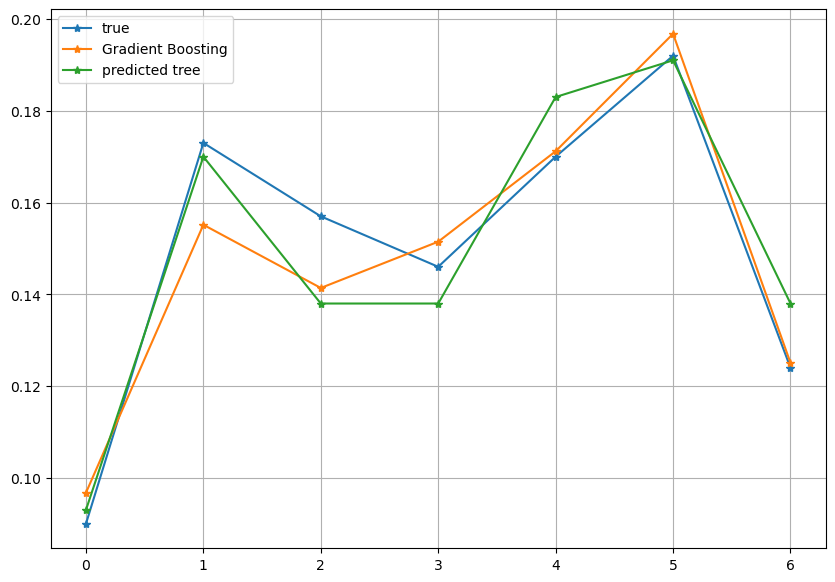

In [30]:
# plot 
plt.figure(figsize=(10,7))
plt.plot(range(y_test.shape[0]),y_test[:,0],marker='*',label='true')
plt.plot(range(y_test.shape[0]),gboost_tree_single.predict(X_test),marker='*',label='Gradient Boosting')
plt.plot(range(y_test.shape[0]),tree_single.predict(X_test),marker='*',label='predicted tree')
plt.grid(),plt.legend()
plt.show()

Get me the Real

source: https://datahub.io/core/s-and-p-500-companies-financials

In [31]:
import pandas as pd

# load data
snp_500=pd.read_csv(r"C:\Users\ishan\OneDrive\Desktop\constituents-financials.csv")
snp_500.head(3)
#EBITDA, or earnings before interest, taxes, depreciation, and amortization

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.390000e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.020000e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [32]:
snp_500.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

In [33]:
rename_dict_500={'Symbol':'symbol','Name':'name','Sector':'sector',
                 'Price':'price','Price/Earnings':'profit','Dividend Yield':'divident',
                 'Earnings/Share':'earning_share','52 Week Low':'low','52 Week High':'high',
                 'Market Cap':'market_cap','EBITDA':'ebitda','Price/Sales':'price_sales',
                 'Price/Book':'book_price','SEC Filings':'links'}

# rename columns 
mdf_snp_500=snp_500.rename(columns=rename_dict_500)
# drop - name,links
mdf_snp_500.drop(columns=['name','links'],inplace=True)
mdf_snp_500.head(3)

,symbol,sector,price,profit,divident,earning_share,low,high,market_cap,ebitda,price_sales,book_price
0,MMM,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.390000e+11,9.048000e+09,4.390271,11.34
1,AOS,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,ABT,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.020000e+11,5.744000e+09,3.740480,3.19


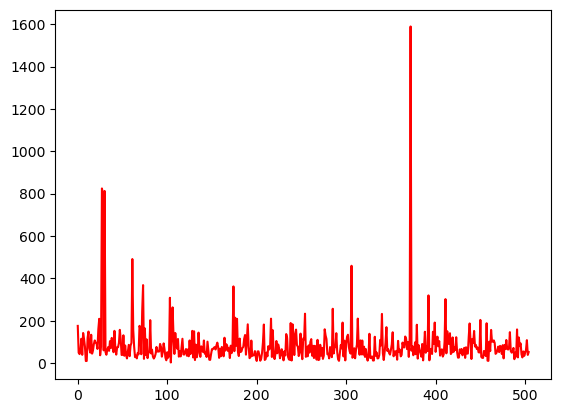

<Axes: >

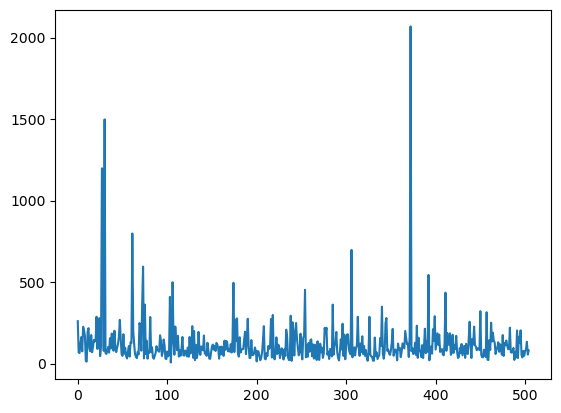

In [34]:
mdf_snp_500.high.plot(c='r')
plt.show()
mdf_snp_500.low.plot()

<Axes: >

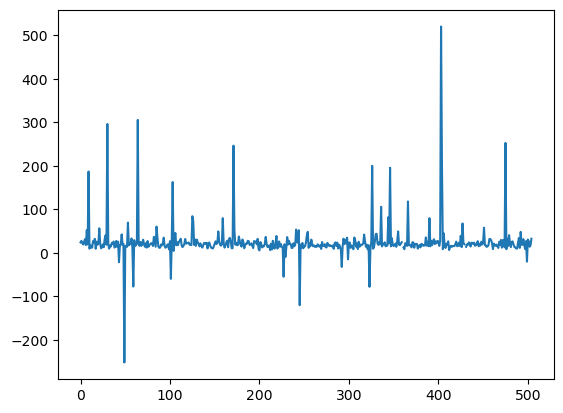

In [35]:
mdf_snp_500.profit.plot()

In [36]:
mdf_snp_500.isna().sum()

symbol           0
sector           0
price            0
profit           2
divident         0
earning_share    0
low              0
high             0
market_cap       0
ebitda           0
price_sales      0
book_price       8
dtype: int64

In [37]:
mdf_snp_500[mdf_snp_500.ebitda==0].shape

(58, 12)

In [38]:
foo_sample=mdf_snp_500[(mdf_snp_500.price/mdf_snp_500.profit)>3]
sample_data=[(foo_sample.price/foo_sample.profit)>5]

In [39]:
# drop null values containing columns 
mdf_snp_500.dropna(axis=0,how='any',inplace=True)
# select data
sample_data=mdf_snp_500[(mdf_snp_500.price/mdf_snp_500.profit)>3]
#sample_data=mdf_snp_500.copy()
print(sample_data.shape)

(308, 12)


In [40]:
# info
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 502
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   symbol         308 non-null    object 
 1   sector         308 non-null    object 
 2   price          308 non-null    float64
 3   profit         308 non-null    float64
 4   divident       308 non-null    float64
 5   earning_share  308 non-null    float64
 6   low            308 non-null    float64
 7   high           308 non-null    float64
 8   market_cap     308 non-null    float64
 9   ebitda         308 non-null    float64
 10  price_sales    308 non-null    float64
 11  book_price     308 non-null    float64
dtypes: float64(10), object(2)
memory usage: 31.3+ KB


In [41]:
# count each type in sector
sample_data.sector.value_counts()

sector
Consumer Discretionary        52
Industrials                   45
Health Care                   45
Financials                    44
Information Technology        43
Real Estate                   21
Consumer Staples              21
Materials                     15
Utilities                     14
Energy                         7
Telecommunication Services     1
Name: count, dtype: int64

Prediction

In [42]:
mdf_snp_500.columns

Index(['symbol', 'sector', 'price', 'profit', 'divident', 'earning_share',
       'low', 'high', 'market_cap', 'ebitda', 'price_sales', 'book_price'],
      dtype='object')

In [44]:
# x-data - ['low','high','market_cap','ebitda','price_sales','book_price']
X_500=sample_data.loc[:,mdf_snp_500.columns[-6:-4]].values 
# y-labels - ['price','profit']
y_500=sample_data.loc[:,['price','profit']].values

# normalize 
X_500_norm,norms_of_x_500=normalize(X_500,norm='l2',axis=0,copy=True,return_norm=True)
y_500_norm,norms_of_y_500=normalize(y_500,norm='l2',axis=0,copy=True,return_norm=True)

# split data 
X_train_500,X_test_500,y_train_500,y_test_500=train_test_split(X_500_norm,y_500_norm,test_size=0.10,random_state=8)

X_train_500.shape,X_test_500.shape,y_train_500.shape,y_test_500.shape

((277, 2), (31, 2), (277, 2), (31, 2))

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create the model
gboost_tree_500 = GradientBoostingRegressor(learning_rate=0.05, loss='squared_error', random_state=10)

# Train the model
gboost_tree_500.fit(X_train_500, y_train_500[:, 1])

# Calculate and print Mean Absolute Error
mae = mean_absolute_error(y_test_500[:, 1], gboost_tree_500.predict(X_test_500)) * norms_of_y_500[1]
print(f'error Gradient Boosting Regressor-outputs un-norm: [{mae}]')

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test_500[:, 1], gboost_tree_500.predict(X_test_500)) * norms_of_y_500[1]
print(f'error Gradient Boosting Regressor-outputs un-norm: [{mse}]')


error Gradient Boosting Regressor-outputs un-norm: [3.8563963072764884]
error Gradient Boosting Regressor-outputs un-norm: [0.05142563052664954]


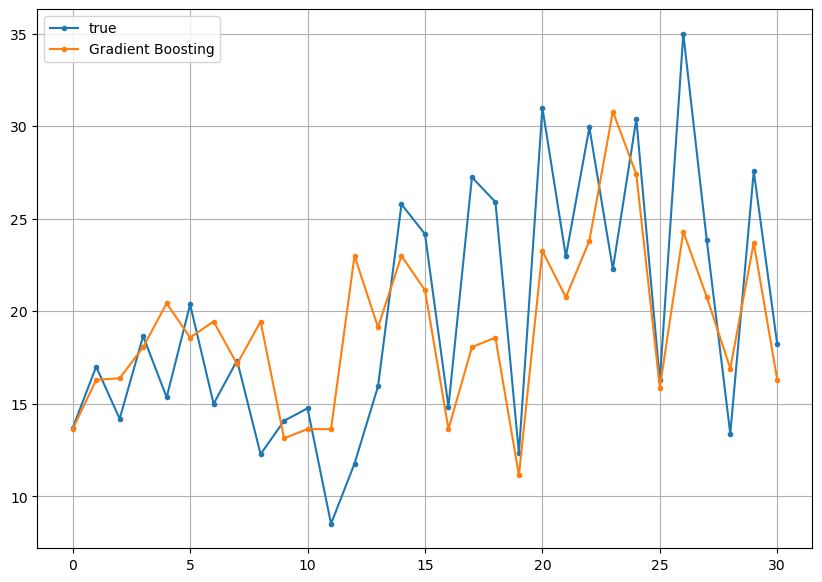

In [47]:
# plot 
plt.figure(figsize=(10,7))
plt.plot(range(y_test_500.shape[0]),y_test_500[:,1]*norms_of_y_500[1],marker='.',label='true')
plt.plot(range(y_test_500.shape[0]),gboost_tree_500.predict(X_test_500)*norms_of_y_500[1],marker='.',label='Gradient Boosting')
plt.grid(),plt.legend()
plt.show()

In [70]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

sample_tester_rfe=GradientBoostingRegressor()

f_selector=RFE(sample_tester_rfe, n_features_to_select=2, step=1)

f_selector.fit(X_500_4_cv,y_500_4_cv[:,1])

RFE(estimator=GradientBoostingRegressor(), n_features_to_select=2)

In [57]:
f_selector.n_features_to_select

2

In [58]:
f_selector.support_

array([False, False, False, False, False,  True, False, False, False,
        True])

In [59]:
f_selector.ranking_

array([8, 4, 7, 9, 3, 1, 5, 2, 6, 1])

Super Test Model 

In [60]:
# x-data - ['low','high','market_cap','ebitda','price_sales','book_price']
X_500=sample_data.loc[:,mdf_snp_500.columns[-6:]].values 
# y-labels - ['price','profit']
y_500=sample_data.loc[:,['price','profit']].values

# normalize 
X_500_4_cv,norms_of_x_500=normalize(X_500,norm='l2',axis=0,copy=True,return_norm=True)
y_500_4_cv,norms_of_y_500=normalize(y_500,norm='l2',axis=0,copy=True,return_norm=True)

In [68]:
# source - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
# source - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# source - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import cross_validate,KFold,GridSearchCV
# source - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
from sklearn.feature_selection import RFE


# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(1, 7))}]
 

# Test classifier - GradientBoostingRegressor
test_clf_GradientBoostingRegressor=GradientBoostingRegressor(learning_rate=0.05,criterion='squared_error')
test_clf_GradientBoostingRegressor.fit(X_500_4_cv,y_500_4_cv[:,1])

# set up GridSearchCV()
model_f_select = GridSearchCV(estimator = RFE(test_clf_GradientBoostingRegressor),param_grid = hyper_params, 
                              scoring= 'r2', cv = folds, verbose = 1, return_train_score=True) 

# fit the model
model_f_select.fit(X_500_4_cv,y_500_4_cv[:,1])    

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=GradientBoostingRegressor(criterion='squared_error',
                                                               learning_rate=0.05)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6]}],
             return_train_score=True, scoring='r2', verbose=1)

In [71]:
# cv results
results_ = pd.DataFrame(model_f_select.cv_results_)
results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.837204,0.084177,0.002285,0.000375,1,{'n_features_to_select': 1},0.247774,-34.227304,0.028676,0.269344,...,-6.706925,13.760454,1,0.916926,0.922350,0.636357,0.923640,0.937469,0.867348,0.115694
1,1.420903,0.164326,0.001811,0.000412,2,{'n_features_to_select': 2},0.482688,-41.824943,0.052856,0.355841,...,-8.157782,16.834263,6,0.943579,0.930349,0.772454,0.938392,0.941487,0.905252,0.066551
2,1.420241,0.060261,0.002267,0.000391,3,{'n_features_to_select': 3},0.421853,-35.523931,0.061957,0.428419,...,-6.853516,14.335830,2,0.948851,0.950393,0.794558,0.953524,0.964649,0.922395,0.064157
3,0.935385,0.174904,0.002258,0.000399,4,{'n_features_to_select': 4},0.481920,-37.555982,0.042329,0.609475,...,-7.194831,15.181766,3,0.959819,0.958813,0.855961,0.962465,0.965962,0.940604,0.042394
4,0.801386,0.066035,0.002153,0.000427,5,{'n_features_to_select': 5},0.385331,-37.966956,0.041936,0.630981,...,-7.303581,15.332836,4,0.963558,0.962127,0.858411,0.964266,0.968514,0.943375,0.042535
5,0.448910,0.032316,0.002368,0.000399,6,{'n_features_to_select': 6},0.407465,-39.170046,0.058868,0.554950,...,-7.554452,15.808624,5,0.963303,0.962611,0.872599,0.964162,0.970133,0.946562,0.037078


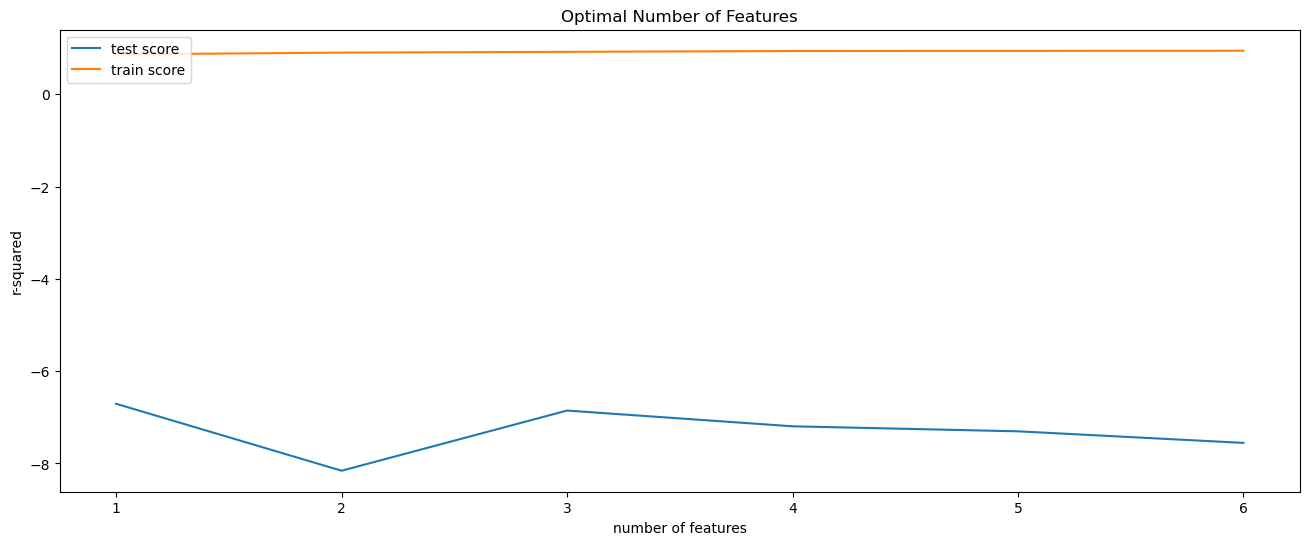

In [72]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(results_["param_n_features_to_select"], results_["mean_test_score"])
plt.plot(results_["param_n_features_to_select"], results_["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [73]:
import seaborn 

In [74]:
d = seaborn.load_dataset('iris')

In [75]:
d.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

C:\Users\ishan\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


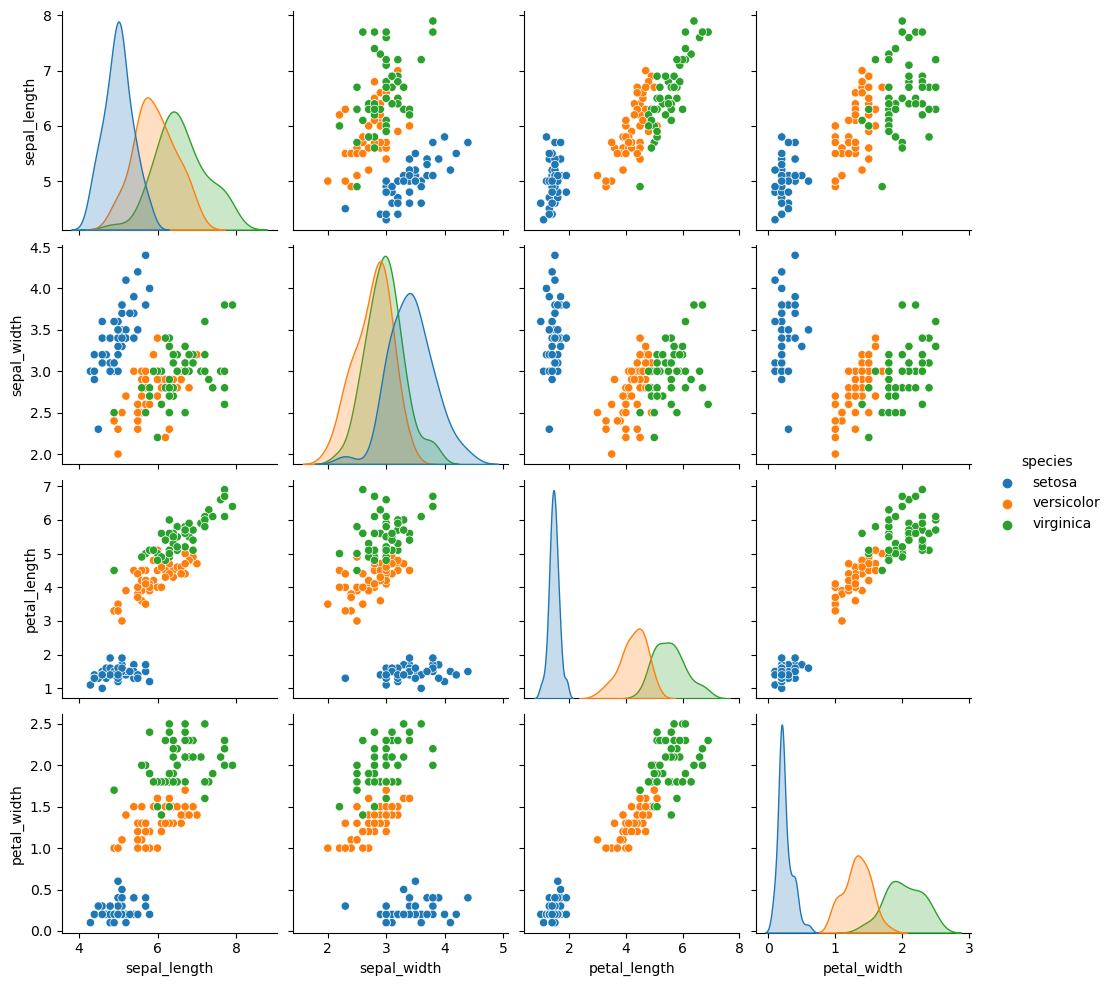

In [77]:
seaborn.pairplot(d,hue='species')